In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [96]:
automobile = fetch_ucirepo(id=10) 
# data (as pandas dataframes) 
df_features = pd.DataFrame(automobile.data.features)
df_targets = pd.DataFrame(automobile.data.targets)

Features Data Exploration

In [97]:
df_features.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [98]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [99]:
df_features.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000


In [100]:
df_features.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

## Data Cleaning

1.a) List of steps taken to clean the data
- The data was loaded into a pandas dataframe as features and targets
- Did the feature exploration and found that the data shape of data is **(205,25)**, with their datatypes. Later I checked for null values and found that there are no null and null values in the data.
- Dropped the columns that weren't of interest and selected only the continuous features: "wheel-base" "length", "width", "height", "curb-weight","engine-size","bore", "stroke","compression-ratio", "horsepower","peak-rpm", "city-mpg", "highway-mpg", "price"

    **Shape of the data after this step: (205, 14)**
- Removed the observations where price was missing where 4 datapoints were removed

     **Shape of the data after this step: (201, 14)**
- Removing observations for which any of the 13 continuous features are missing 

    **Shape of the data after this step: (195, 14)**
- Converted all the features to float64 datatype


In [101]:
print("Shape before Cleaning: \n",df_features.shape)

#emoving the (non-continuous) features that are not of interest
continuous_features = [
    "wheel-base", "length", "width", "height", 
    "curb-weight", "engine-size", "bore", "stroke", 
    "compression-ratio", "horsepower", "peak-rpm", 
    "city-mpg", "highway-mpg", "price"
]
df_features = df_features[continuous_features]
print("Shape after removing non-continous features: \n",df_features.shape)

#removing the obersavtion if price is missing
df_features = df_features.dropna(subset=["price"])
print("Shape after removing missing price: \n",df_features.shape)

#removing observations for which any of the 13 continuous features are missing
df_features = df_features.dropna()
print("Shape after removing missing values: \n",df_features.shape)

#converting all features to float64
df_features = df_features.astype(np.float64)
df_features.info()


Shape before Cleaning: 
 (205, 25)
Shape after removing non-continous features: 
 (205, 14)
Shape after removing missing price: 
 (201, 14)
Shape after removing missing values: 
 (195, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         195 non-null    float64
 1   length             195 non-null    float64
 2   width              195 non-null    float64
 3   height             195 non-null    float64
 4   curb-weight        195 non-null    float64
 5   engine-size        195 non-null    float64
 6   bore               195 non-null    float64
 7   stroke             195 non-null    float64
 8   compression-ratio  195 non-null    float64
 9   horsepower         195 non-null    float64
 10  peak-rpm           195 non-null    float64
 11  city-mpg           195 non-null    float64
 12  highway-mpg        195 non-null   

In [102]:
#Sepearte price and other features
target = df_features["price"]
features = df_features.drop("price", axis=1)

In [103]:
#Plots scatter plots for each feature in 'features' against 'target'
def plot_scatter(features, target):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i, ax in enumerate(axes.ravel()):
        if i < len(features.columns):
            ax.scatter(features.iloc[:, i], target, s=5)
            ax.set_xlabel(features.columns[i])
            ax.set_ylabel("price")
    plt.tight_layout()
    plt.show()

1.b) Plot of target variable as function of predictor variable

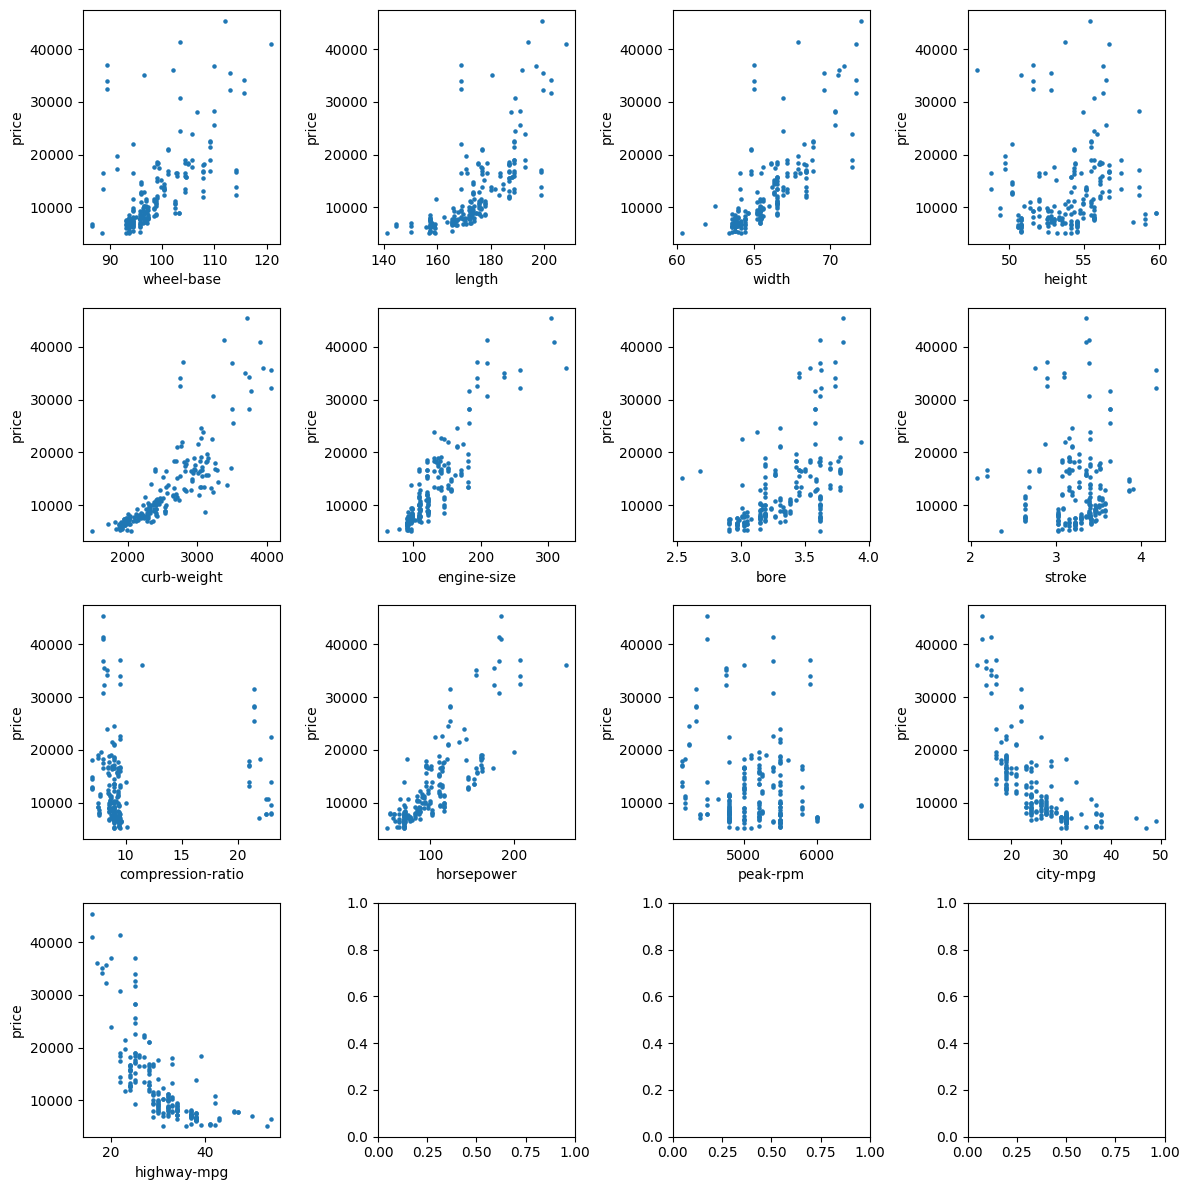

In [104]:
plot_scatter(features, target)

1. c)
- Wheel-Base: There seems to be a moderate positive linear relationship between wheel-base and price. Larger wheel-base values tend to correspond to higher-priced cars.

- Length: Similar to wheel-base, there is a moderate positive linear relationship with price, indicating longer cars generally command higher prices.

- Width: The scatter plot suggests a stronger positive linear relationship with price compared to length and wheel-base, indicating that wider cars may be a good predictor of higher prices.

- Height: The relationship is less clear, with a lot of variation in price across the range of heights. Height may not be a strong standalone predictor of price.

- Curb-Weight: There's a strong positive linear relationship with price. Heavier cars tend to be more expensive, maybe because more equipment or more substantial materials used.

- Engine-Size: This feature shows a strong positive linear relationship with price, indicating it could be a significant predictor since larger engines are typically found in more expensive vehicles.

- Bore: The relationship is subdued, but there seems to be a slight positive trend. Larger bore diameters could correlate to higher performance and, consequently, to higher prices.

- Stroke: The scatter does not show a clear pattern, suggesting that stroke may not be a reliable or good predictor of car price.

- Compression-Ratio: There's no clear linear relationship, and the data points are quite scattered, indicating that compression ratio might not be a good predictor of car price.

- Horsepower: There's a strong positive correlation with price, as more powerful cars generally cost more.

- Peak-RPM: The plot does not indicate a strong relationship with price; if anything, there's a lot of dispersion, which suggests peak RPM may not be a good predictor of car price.

- City-MPG: The plot shows a somewhat negative relationship with price, indicating that cars with lower fuel efficiency i.e lower MPG tend to be more expensive, possibly because they are performance-oriented.

- Highway-MPG: Similar to city-MPG, there's a negative relationship with price. Cars with higher MPG, which are often smaller and less powerful, tend to be less expensive.

The most promising features for predicting a car's price are curb-weight, engine-size, and horsepower, which all show strong positive relationships with price

In [105]:
#check correlation between price and other features
corr = df_features.corr()
corr["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.888942
curb-weight          0.835729
horsepower           0.811027
width                0.754273
length               0.695331
wheel-base           0.585793
bore                 0.546873
height               0.138291
stroke               0.093746
compression-ratio    0.069500
peak-rpm            -0.104333
city-mpg            -0.702685
highway-mpg         -0.715590
Name: price, dtype: float64

### 1. d) Pairwise Scatterplots

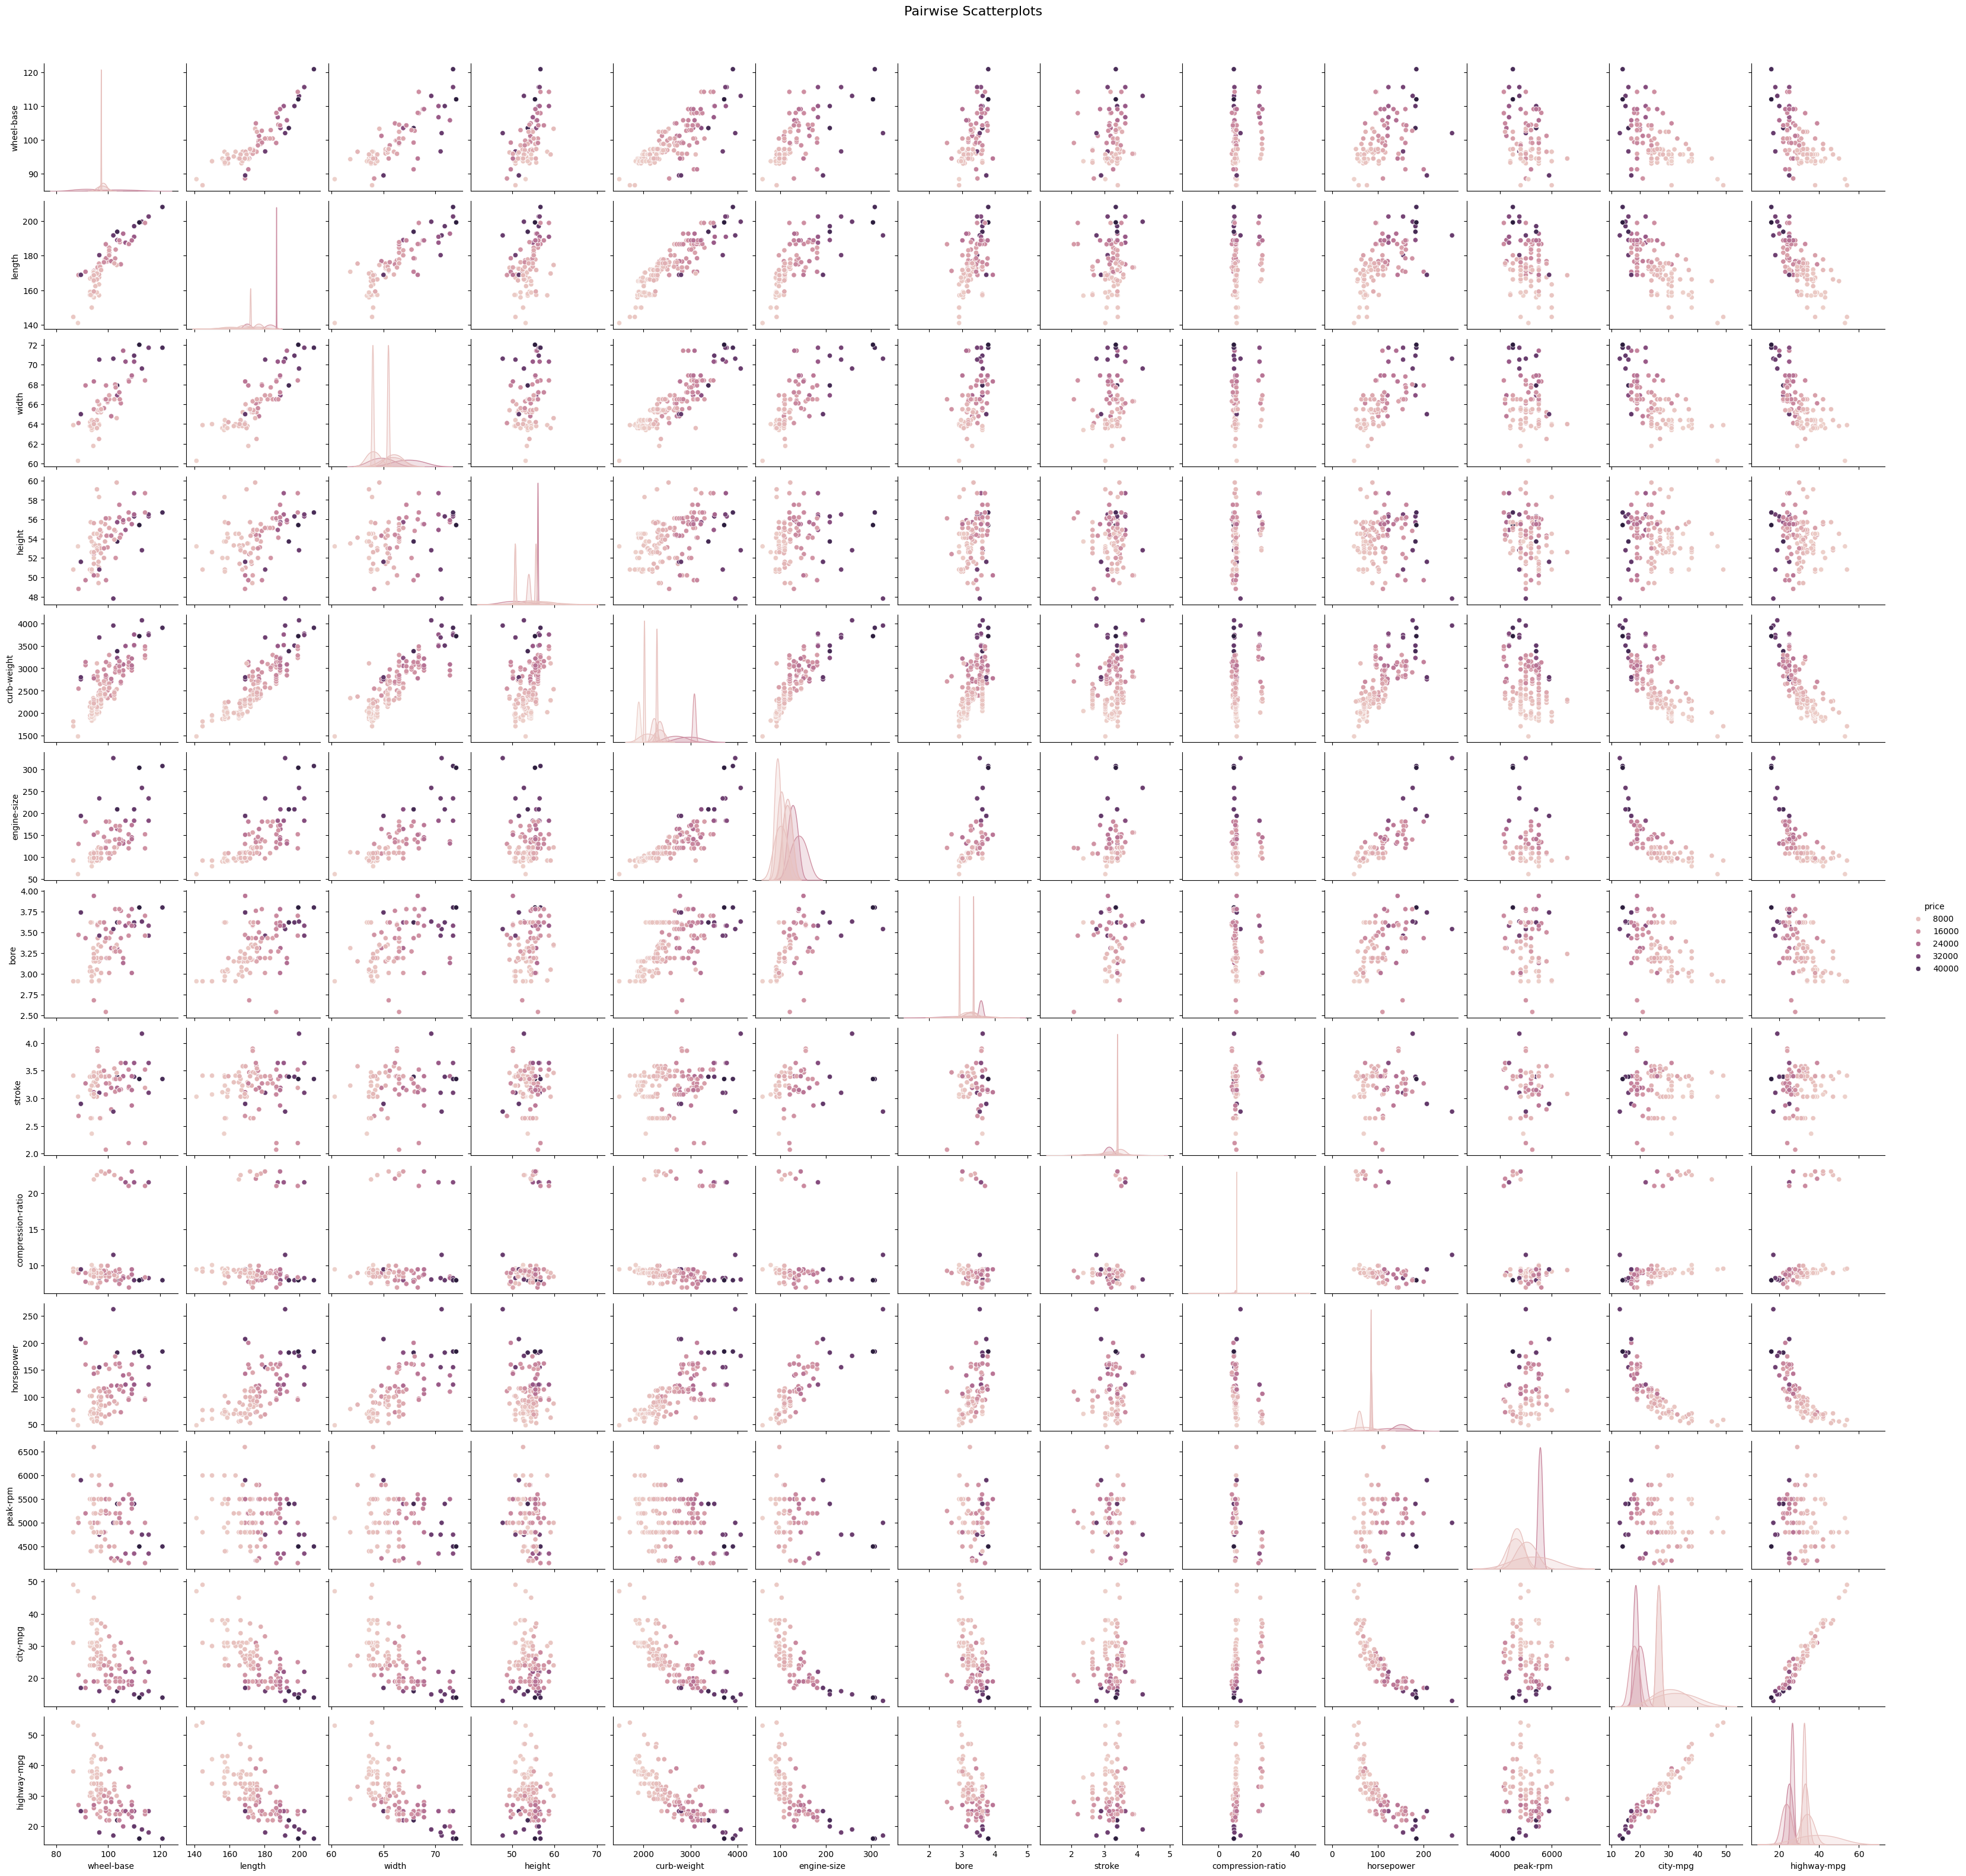

In [106]:
#Plot each pair-wise combination of features using scatter plots to aid in (visually) identifying features that are related (correlated).This type of visualization is often referred to as a “scatterplot matrix” or “pairwise scatterplots.” produces a set of pair-wise feature scatter plots, perhaps with symbols that may be color-coded by target variable.
sns.pairplot(features.join(target), hue="price")
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Scatterplots', fontsize=16)
plt.show()

1.e)
- city-mpg and highway-mpg, show an almost perfect linear arrangement of points hence concluding that they have strong correlation and appear almost as a straight line

- width and length show positive linear arrangement of points hence it is preferable not to use them together for training

- wheelbase and length show positive correlation and this can be concluded by the almost perfect linear arrangement of points hence implies that its not preferred to use them together

- horesepower with highway-mpg and city-mpg shows almost perfect negaive linear arrangement of points hence it is preferred to not use horsepower with their of these features 

To verify my results of predicting with the pairwise scatterplot, I've used corr() to determine the numerical correlation between the features

In [107]:
#find the correlation between features
corr = features.corr()
corr

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
wheel-base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220
height,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188
curb-weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710
engine-size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453
compression-ratio,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941
horsepower,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917


In [108]:
#check which features are highly correlated with each other
def get_high_correlations(corr, threshold):
    # find the correlations that are higher than the threshold
    # and return a list of pairs of features along with their correlation
    pairs = []
    for i in range(corr.shape[0]):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    return pairs

In [109]:
get_high_correlations(corr, 0.75)

[('length', 'wheel-base', 0.8792218466137138),
 ('width', 'wheel-base', 0.8190085867131475),
 ('width', 'length', 0.8580838057767729),
 ('curb-weight', 'wheel-base', 0.7827202183574524),
 ('curb-weight', 'length', 0.8816649676455983),
 ('curb-weight', 'width', 0.8673145567481413),
 ('engine-size', 'curb-weight', 0.8575732382520633),
 ('horsepower', 'curb-weight', 0.7602852178937226),
 ('horsepower', 'engine-size', 0.8426910201423576),
 ('city-mpg', 'curb-weight', -0.7721708592057596),
 ('city-mpg', 'horsepower', -0.8341165353698256),
 ('highway-mpg', 'curb-weight', -0.8127096751739398),
 ('highway-mpg', 'horsepower', -0.8129168680324589),
 ('highway-mpg', 'city-mpg', 0.9723499165399174)]

- There's additional information with these values of the correlation, but the observations with pair wise scatter plot looks good

### Question 2) Unregularized Regression

In [110]:
#perform unregularized linear regression on the data set using features that are not highly correlated with each other
def linear_regression(features, target):
    #split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
    
    #fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #predict the target values for the test set
    y_pred = model.predict(X_test)

    #calculate the coeeficients
    coef = model.coef_
    #calculate the weights
    weights = np.append(coef, model.intercept_)
    print("Weights: ", weights)

    #calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("MSE: %.2f" % mse)
    
    #calculate the root mean squared error
    rmse = np.sqrt(mse)
    print("RMSE: %.2f" % rmse)
    
    #calculate the coefficient of determination (R^2)
    r2 = model.score(X_test, y_test)
    print("R^2: %.2f" % r2)

    #calculate the Pearson correlation coefficient
    corr = pearsonr(y_test, y_pred)
    print("Pearson correlation coefficient: %.2f" % corr[0])
    
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 5))
    # Scatter plot of actual prices vs residuals
    plt.scatter(y_test, residuals, color='red', label='Residuals')
    plt.axhline(y=0, color='green', linestyle='--', label='Zero Error')

    # Adding labels and title
    plt.xlabel('Actual Price')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Actual Price')
    plt.legend()

    plt.figure(figsize=(10, 5))
    # Scatter plot for actual values
    plt.scatter(y_test, y_test, color='blue', label='Actual Values')

    # Scatter plot for predicted values
    plt.scatter(y_test, y_pred, color='red', label='Predicted Values')

    y_pred = y_test
    # Diagonal line for reference (represents perfect predictions)
    plt.plot(y_test, y_pred, color='green', linestyle='--', label='Perfect Predictions')

    # Labels and legend
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()

# Show the plot
plt.show()


## Proposed model 1

**Features used: [engine-size, width, highway-mpg]**

I have proposed these features for model due to the following reasons:
-  Engine-size and width show strong postive correlation with the price. Since width is squared function with price it is tranformed.
- Highway-mpg show strong negative correlation with the price and hence is transfomed to highway-mpgconverted by taking its reciprocal
- I separated highly correlated features to avoid multicollinearity, where one independent
variable can be predicted from another. However, I grouped features such as engine-size
with highway-mpg and width as they have moderate correlation and will not cause multicollinearity


Weights:  [ 1.35511007e-01  3.18500568e-03  1.39736287e+02 -2.26347492e+01]
MSE: 5.88
RMSE: 2.43
R^2: 0.90
Pearson correlation coefficient: 0.95


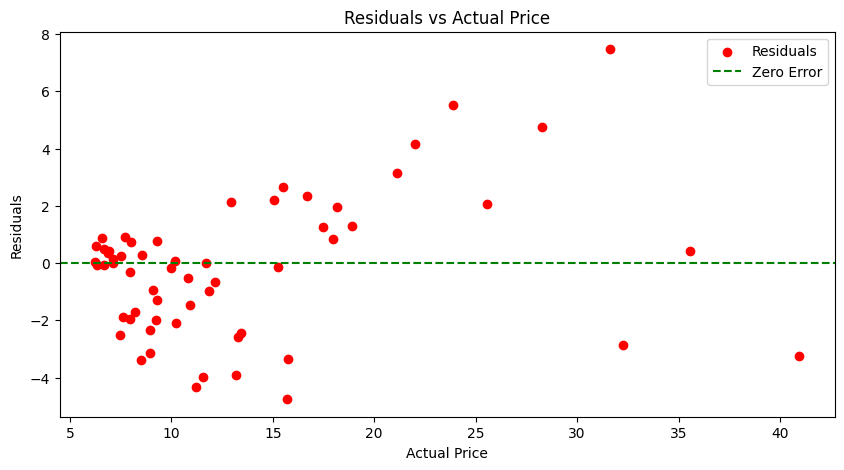

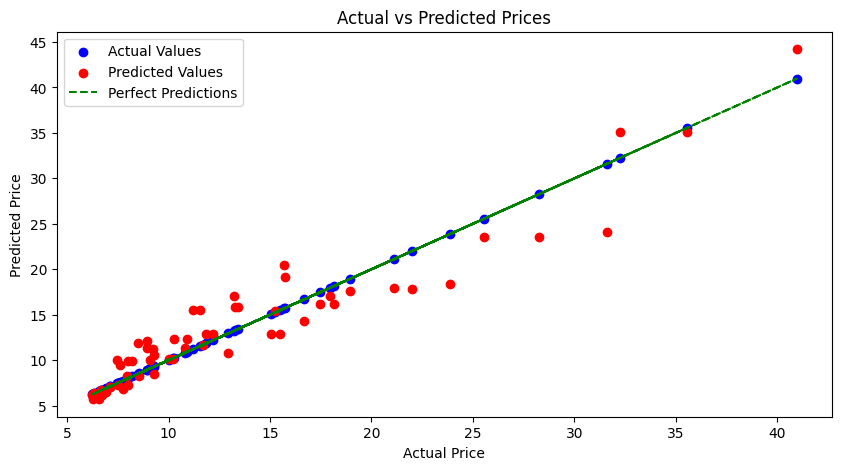

In [111]:
#transform highwaympg by taking its reciprocal
features['highway-mpgconverted'] = 1 / features['highway-mpg']
features['widthsquared'] = features['width'] ** 2
X1= features[['engine-size','widthsquared', 'highway-mpgconverted']]
linear_regression(X1, target/1000)

## Proposed Model 1 Feedback
2) b)
- Values of weights are 1.35511007e+02 (engine-size) , 3.18500568e+00 (width),  1.39736287e+05 (highway-mpg), -2.26347492e+04 (Bias)

- R^2 value: 0.90

- By looking at the residuals and actual price plot at the top we can see that the model is good for price range 5000 to 20000 and model is bad at the higher price range i.e from 20000 to 40000

- Errors seems systematic as the error is changing consistently in the same directon

- Overally my impress of the model is that it looks good as the R^2 is high and the predicted values are very close to the perfect true values.


## Proposed model 2

**Features used: [curb-weight, city-mpg, length]**

I have proposed these features for model due to the following reasons:

-  curb-weight show strong postive correlation with the price and length show moderate postive correlation with the price. Since length is squared function with price it is tranformed.
- city-mpg show strong negative correlation with the price and hence is transfomed to city-mpgconverted by taking its reciprocal
- I separated highly correlated features to avoid multicollinearity, where one independent
variable can be predicted from another. However, I grouped features such as curb-weight
with length and city-mpg as they have moderate correlation and will not cause multicollinearity

Weights:  [ 7.38430559e-03  3.62277888e+02 -1.32594628e-04 -1.67550834e+01]
MSE: 9.69
RMSE: 3.11
R^2: 0.84
Pearson correlation coefficient: 0.92


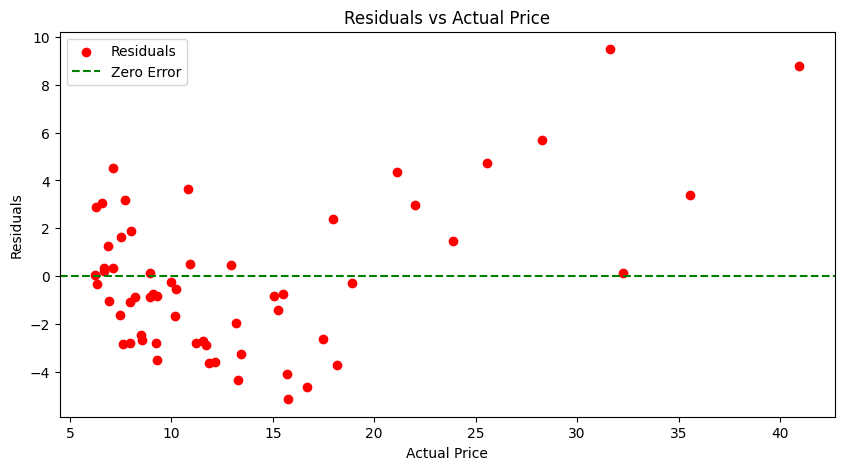

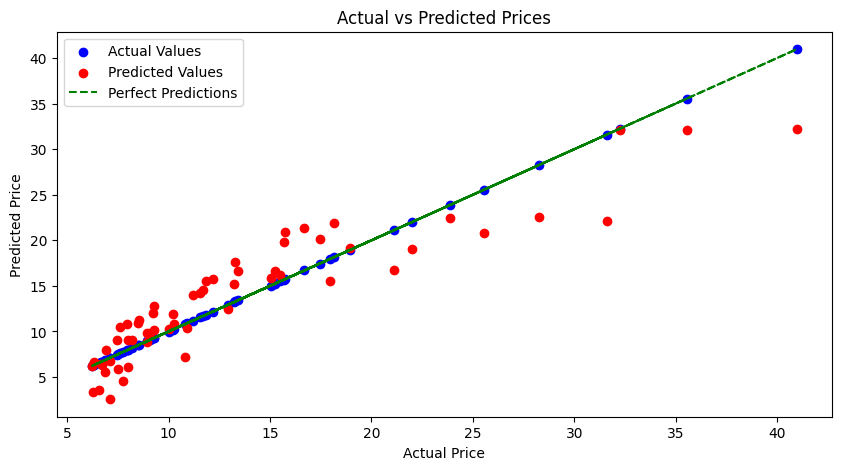

In [112]:
#transform city-mpg by taking its reciprocal
features['city-mpgconverted'] = 1 / features['city-mpg']
features['lengthsquare'] = features['length']**2
X2= features[['curb-weight','city-mpgconverted','lengthsquare']]
linear_regression(X2, target/1000)

## Proposed Model 2 Feedback
2) c)
- Values of weights are 7.38430559e+00  (curb-weight) , 3.62277888e+05 (city-mpg),  -1.32594628e-01(length), -1.67550834e+04(Bias)

- R^2 value: 0.84

- By looking at the residuals and actual price plot at the top we can see that the model is good for price range 5000 to 15000 and model is bad at the higher price range i.e from 15000 to 40000

- Errors seems radom as the error is not changing in the same directon

- Overally my impress of the model is that it is a average model as the R^2 is moderately good and the predicted values are not very close to the perfect true values. A better feature can be chosen.

## Proposed model 3

**Features used: [engine-size, horsepower, wheel-base]**

I have proposed these features for model due to the following reasons:

- engine-size and horsepower show strong postive correlation with the price.
- wheel-base shows slight postive correlation with price but is correlated with most features and hence might be helpful to choose these to measure trends of other features
- I separated highly correlated features to avoid multicollinearity, where one independent
variable can be predicted from another. However, I grouped features such as engine size
with horsepower and wheel-base as they have moderate correlation and will not cause multicollinearity

Weights:  [  0.11441199   0.05640989   0.18129657 -25.12745054]
MSE: 7.11
RMSE: 2.67
R^2: 0.88
Pearson correlation coefficient: 0.94


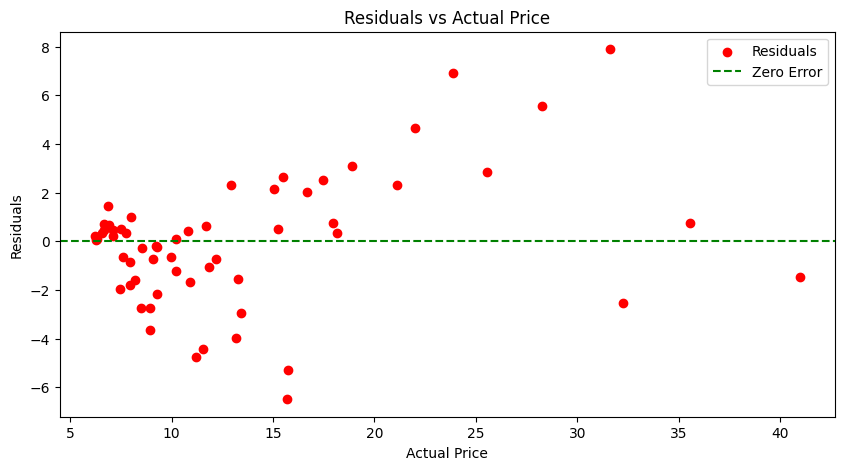

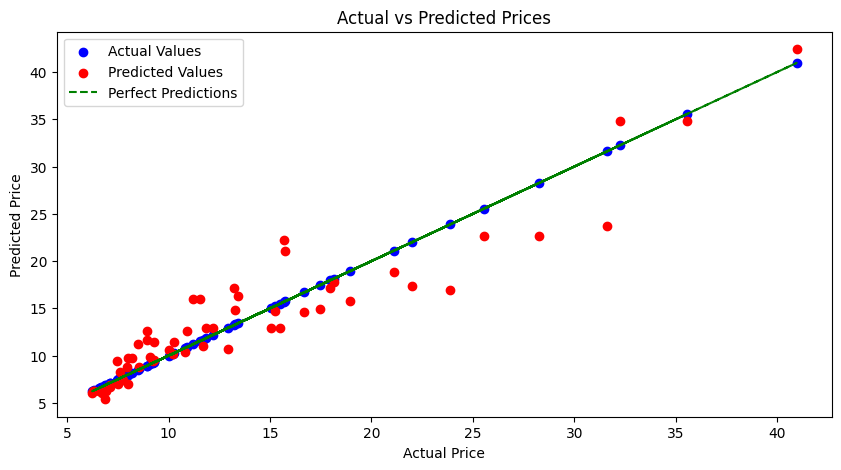

In [113]:
X3= features[['engine-size','horsepower','wheel-base']]
linear_regression(X3, target/1000)

## Proposed Model 3 Feedback
2) d)
- Values of weights are 114.41199048(engine-size)  ,  56.40988896 (horse-power) ,  181.2965655 (wheel-base) , -25127.4505374 (bias)
- R^2 value: 0.88

- By looking at the residuals and actual price plot at the top we can see that the model is good for price range 5000 to 10000 and model is bad at the higher price range i.e from 10000 to 40000

- Errors seems radom as the error is not changing in the same directon

- Overally my impress of the model is that it is a average model as the R^2 is good and the predicted values are not very close to the perfect true values. A better feature can be chosen.

## Selecting a model

2. e)
- Selected model: Predicted model 1
- Features: engine-size, width, highway-mpg
- R^2: 0.9
- This model is selected as the R^2 is high and errors are systematic in nature. The predicted values are close to the true values as compared to the other two models

## Question 3

3 a) The equivalence of the coefficient of determination R^2 and the square of sample correlation r^2 cannot be extended to multiple linear regression models. It works in simple linear regression as there is only one independent predictor variable, in multiple linear
regression there are multiple independent predictor variables and correlation coefficients, he entire model may not fit using just one correlation coefficient. In multiple linear regression, \(R^2\) reflects the combined explanatory power of all predictors for the dependent variable, not a single correlation. There's no single correlation coefficient for multiple predictors, as \(r\) only applies to pairs of variables. \(R^2\) can increase with more variables, potentially leading to overfitting, which is why adjusted \(R^2\) is often used. Complex interactions between predictors are not captured by a single \(r\) value.


3 b) In multiple linear regression, R^2 tells us how well the model fits the data, while thesample correlation (r) is a measure of correlation between two variables (x and t). r^2 determines the relationship between a single independent variable and the dependent variable whereas R^2 takes into account all the independent predictor variables. The coefficient of determination, \(R^2\), in the multiple linear regression, provides a measure of how well all the predictors explain the variability of the response variable, it takes in collective effect of all variables and interactions between them. On the other hand, \(r\) (and consequently \(r^2\)) measures the strength and direction of the linear relationship between only two variables. In simple linear regression, \(r^2\) will equal \(R^2\) because there is only one independent variable, but \(r\) does not account for multiple variables or their interactions, which \(R^2\) does in the context of multiple regression

### Cross Validation

In [114]:
def l2norm(features, target):
    # Set up repeated K-Fold cross-validator
    n_splits = 5
    n_repeats = 40
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)

    # Initialize arrays to store results
    coefficients = []
    mse_scores = []
    rmse_values = []
    predictions = np.zeros((target.shape[0], 200))
    model_count = 0

    # Run cross-validation
    for train_index, test_index in rkf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Initialize Ridge Regression model
        model = Ridge(alpha=0.1)
        model.fit(X_train, y_train)

        # Store coefficients
        coefficients.append(np.hstack([model.coef_, model.intercept_]))

        # Make predictions
        y_pred = model.predict(X_test)
        # Store predictions
        predictions[:, model_count] = model.predict(features)
        model_count += 1
        # Calculate and store MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
    
    mean_predictions = np.mean(predictions, axis=1)

    # Convert lists to NumPy arrays for easier handling
    coefficients = np.array(coefficients)
    mse_scores = np.array(mse_scores)
    r2 = np.array(r2)

    # Calculate mean and variance of MSE
    mean_mse = np.mean(mse_scores)
    
    # Calculate variance of the predictions with respect to the average model estimate
    mean_predictions_reshaped = mean_predictions.reshape(-1, 1)
    variances = np.var(predictions - mean_predictions_reshaped, axis=0) 
    mse_variance = np.mean(variances)

    return coefficients, predictions,mean_predictions,mse_scores, mean_mse, mse_variance, r2

In [115]:
def plot_model_realizations(predictions, target, mean_predictions):
    sorted_indices = np.argsort(target)
    sorted_target = target.iloc[sorted_indices].reset_index(drop=True)
    sorted_predictions = predictions[sorted_indices]
    sorted_mean_predictions = mean_predictions[sorted_indices]

    #Plot tˆ vs. t for the first 20 model realizations
    plt.figure(figsize=(12, 8))
    for i in range(min(20, sorted_predictions.shape[1])):
        plt.plot(sorted_target, sorted_predictions[:, i], label=f'Model {i+1}', linestyle='--', alpha=0.5)

    #Plot the average model prediction vs. the actual prices in a distinctive style
    plt.plot(sorted_target, sorted_mean_predictions, 'k-', linewidth=2, label='Average Model Prediction')
    plt.plot(target, target, 'r--', label='Perfect Prediction', linewidth=2)

    # Adding labels and title
    plt.xlabel('Actual Price (t)')
    plt.ylabel('Predicted Price (tˆ)')
    plt.title('Model Predictions vs. Actual Prices')
    plt.legend()
    plt.show()

## Question 1
# Proposed Model 1

i) Weights:  [ 1.35511007e-01  3.18500568e-03  1.39736287e+02 -2.26347492e+01]
Equation: predicted_price = x1*1.35511007e-01 + x2*3.18500568e-03 +x3*1.39736287e+02 -2.26347492e+01

In [116]:
# You may need to adjust the 'alpha' parameter which controls the strength of regularization
X1= features[['engine-size','widthsquared', 'highway-mpgconverted']]
Y1= target/1000
coefficients, predictions,mean_predictions, mean_scores, mean_mse, variance,r2 = l2norm(X1, Y1)

ii) Predicted prices and Mean model prediction with their shapes

In [117]:
#Predicted prices for first proposed model
print("r2: ", r2)
print("Predicted Prices for first proposed model: \n", predictions)
print("\nMean Predicted Prices for first proposed model: \n", mean_predictions)
print("\nShape of Predicted Prices for first proposed model: ", predictions.shape)
print("\nShape of Mean Predicted Prices for first proposed model: ", mean_predictions.shape)

r2:  0.7572868048915354
Predicted Prices for first proposed model: 
 [[12.33342661 11.49525588 12.50375956 ... 12.02506461 11.8941962
  12.64842676]
 [12.33342661 11.49525588 12.50375956 ... 12.02506461 11.8941962
  12.64842676]
 [16.517412   15.78946125 16.83008297 ... 16.03379199 16.12771992
  17.15098964]
 ...
 [22.12269445 22.10838691 22.48380943 ... 21.5120297  22.0847011
  22.93705986]
 [18.07620892 18.4194969  18.18881307 ... 17.73096548 18.22906122
  18.39543178]
 [17.5148887  17.90785962 17.59005566 ... 17.20265338 17.69185368
  17.75793031]]

Mean Predicted Prices for first proposed model: 
 [12.10206377 12.10206377 16.32331108 10.79445587 14.81350689 14.71299258
 19.00390759 19.00390759 18.33327208  9.53671246  9.53671246 17.4512578
 17.4512578  19.15638772 25.53219811 26.35583481 28.91626048 -0.59746402
  6.01272308  6.01272308  6.17244934  6.17930978  7.33433479  6.17930978
  6.17930978  6.17930978  7.33433479 11.35202815 17.54398695  6.51206038
  6.53984093  4.77277261  6

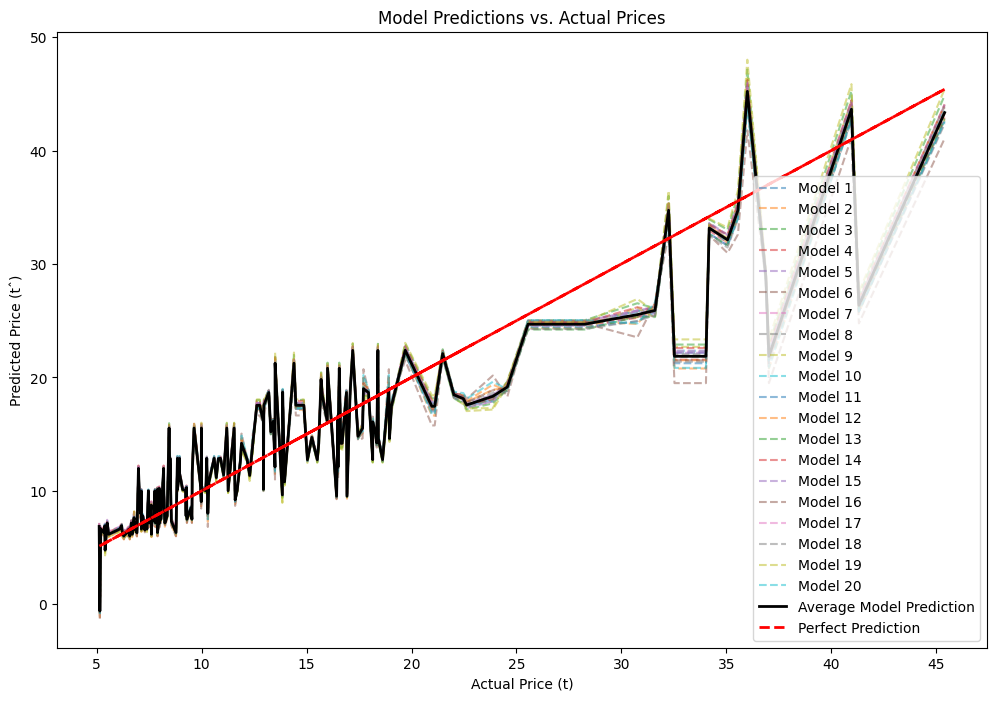

In [118]:
#predicted price vs actual price for first proposed model for 20 model realizations
plot_model_realizations(predictions, Y1, mean_predictions)

iii) Mean square error (MSE) for each model realization and  E{MSE} for this model. 

In [119]:
#MSE for each model realization for first proposed model and its mean E{MSE}
print("MSE for each model realization for first proposed model: \n", mean_scores)
print("shape of MSE for each model realization for first proposed model: ", mean_scores.shape)
print("\nMean E{MSE} for first proposed model: ", mean_mse)

MSE for each model realization for first proposed model: 
 [ 8.53797347 18.60166134  9.63595199 13.6325744  13.43012431 26.87314445
  8.23290254  8.26438073 10.97162659 13.48552397 11.68991708 12.41120864
 10.84582432  9.24472679 18.81659952 14.36920817  8.87251688 12.33324635
 11.47906428 18.56997633 28.60211383 11.59147574  7.66234085 10.76409896
 12.55926053 23.28500719 17.01598402  9.68252835 10.15415902  7.21062204
  9.54163211 10.71182714 10.77263429 13.88286858 23.1748497  11.7175389
 10.71734048 20.35993549 12.58471519  9.07958898  9.69033004 14.29961837
 20.89244831  6.61751745 11.56014348 15.89716365 15.26929043 11.42211076
 10.63074082 12.68412306 17.18113041 12.28168303  7.44899431 15.82433634
 11.30762702 20.69855165 15.21831704  7.2018535  13.26715074  6.90711514
  7.25498826 14.695949   10.27222011 10.66949305 20.06486948 12.1548907
 15.02550658  9.10143286 14.11804051 13.33608378  4.45548828 13.92666941
  9.68502373 19.38416426 18.25833459 13.68098526 13.78528216 16.828

iv) Variance and mean variance

In [120]:
print("Variance for first proposed model: ", variance)

Variance for first proposed model:  0.086933666343132


v) (bias)^2 +noise variance = E{MSE} - variance

In [121]:
#Calculate Bias^2 + noise variance for first proposed model
bias_noise = mean_mse - variance
print("Bias^2 + noise variance for first proposed model: ", bias_noise)

Bias^2 + noise variance for first proposed model:  12.981195925492605


## Impression of variance and (bias)^2 + noise variance

vi) Variance for the first proposed model: 0.086933666343132
Bias^2 + noise variance for the first proposed model: 12.981195925492605

Model 1 has a relatively low variance but a high bias (squared) plus noise variance. This suggests that the model has greater consistency across different datasets that is it doesn't change its predictions much with different training data, but it suffers from greater systematic error. The systematic error could be due to the model not being complex enough to capture the pattern in the data (high bias), or it could be due to inherently noisy or complex data that the model cannot perfectly predict (noise variance).

# Proposed Model 2

i) Weights:  [ 7.38430559e-03  3.62277888e+02 -1.32594628e-04 -1.67550834e+01]
Equation: predicted_price = x1*7.38430559e-03 + x2*3.62277888e+02 +x3*-1.32594628e-04 -1.67550834e+01

In [122]:
coefficients, predictions,mean_predictions, mean_scores, mean_mse, variance,r2 = l2norm(X2, Y1)

ii) Predicted prices and Mean model prediction with their shapes

In [123]:
#Predicted prices for second proposed model
print("r2: ", r2)
print("Predicted Prices for second proposed model: \n", predictions)
print("\nMean Predicted Prices for second proposed model: \n", mean_predictions)
print("\nShape of Predicted Prices for second proposed model: ", predictions.shape)
print("\nShape of Mean Predicted Prices for second proposed model: ", mean_predictions.shape)

r2:  0.7926647123915784
Predicted Prices for second proposed model: 
 [[14.0885587  13.3852027  13.70795485 ... 13.36292964 13.93051755
  14.0375443 ]
 [14.0885587  13.3852027  13.70795485 ... 13.36292964 13.93051755
  14.0375443 ]
 [18.17348901 17.15503916 17.4845532  ... 16.94595175 17.96792963
  18.02537605]
 ...
 [18.68720871 18.52222631 18.75198493 ... 18.08260532 18.81128767
  18.70184739]
 [21.70221391 21.16256112 21.31645493 ... 20.61598975 21.69614056
  21.53298733]
 [19.43877715 19.18402628 19.40076093 ... 18.71703474 19.53448459
  19.41377657]]

Mean Predicted Prices for second proposed model: 
 [13.78213752 13.78213752 17.68230593  9.75820335 17.17852306 12.37040145
 15.64056602 17.26715945 19.3166826  10.62316979 10.62316979 15.34641799
 16.1597147  19.14379382 21.92860838 23.59425674 25.13235666  0.27330717
  4.73905566  4.9822223   4.64801142  4.73047446  8.60517106  6.07611084
  6.40142952  6.40142952  9.53676547 12.89725085 17.29776893  3.28610104
  5.04034964  4.73455

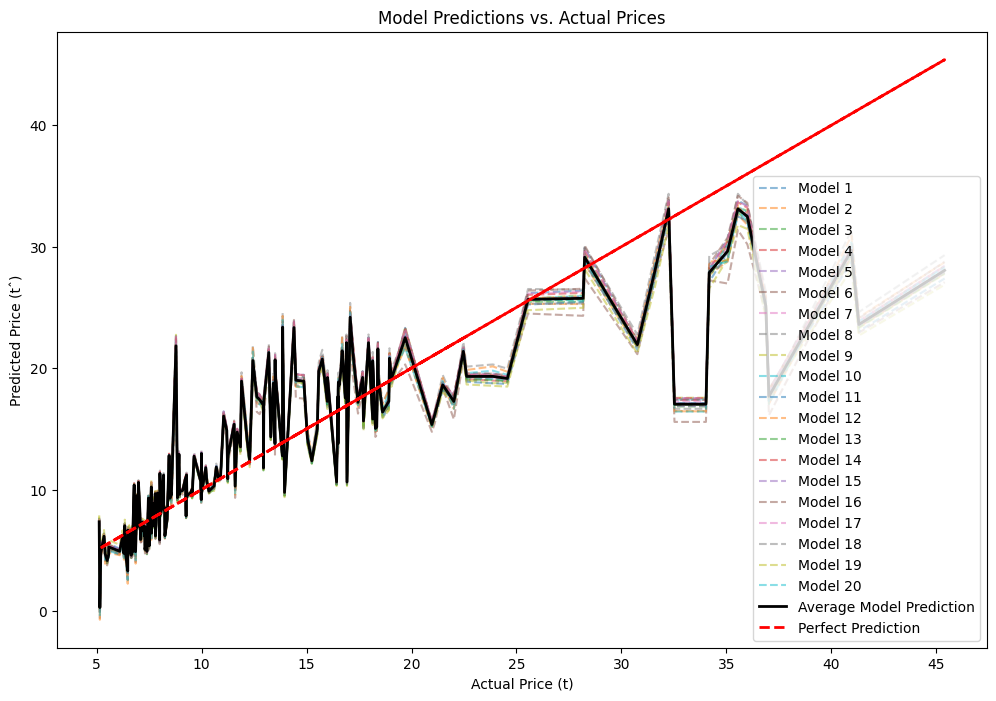

In [124]:
#predicted price vs actual price for first proposed model for 20 model realizations
plot_model_realizations(predictions, Y1, mean_predictions)

iii) Mean square error (MSE) for each model realization and  E{MSE} for this model. 

In [125]:
#MSE for each model realization for second proposed model and its mean E{MSE}
print("MSE for each model realization for second proposed model: \n", mean_scores)
print("shape of MSE for each model realization for second proposed model: ", mean_scores.shape)
print("\nMean E{MSE} for second proposed model: ", mean_mse)

MSE for each model realization for second proposed model: 
 [27.23853364 27.44367488  7.74524556 17.60194493 16.09996751 42.88682404
 12.8827437  14.93056097 16.22214962 15.89919392 18.978716   18.6186104
 14.60325222 18.15404689 27.27222229 24.24839086 12.71781948 15.82709734
 18.81148087 27.75041529 41.45387362 11.66719027 23.93276056  9.33622797
 14.39391159 31.18545833 28.45381061  9.77877788  7.09169436 23.54520004
 12.65069856 11.10961646 14.06174787 26.58551253 34.38051363 15.61431139
 15.67326098 26.71240034 24.83660302 15.88621555 13.66901276 28.75576285
 31.10721101 10.98393439 13.72601062 24.99530483 24.54511701 18.8960631
 13.77372111 13.6096513  24.97179403 20.29778092 11.56687665 19.79162643
 22.51804182 24.32198346 21.07736251 14.39850441 23.80688764 17.16434837
 11.92108904 24.86418099 18.20396576 18.63393847 26.80309223  9.18866374
 25.60487848 17.87397487 16.76102802 28.1390052  18.16477772 16.8278457
 15.79582317 30.53524904 15.68101665 11.88001679 16.83068611 27.819

iv) Variance and mean variance

In [126]:
print("Variance for second proposed model: ", variance)

Variance for second proposed model:  0.09111166063512383


v) (bias)^2 +noise variance = E{MSE} - variance

In [127]:
#Calculate Bias^2 + noise variance for second proposed model
bias_noise = mean_mse - variance
print("Bias^2 + noise variance for second proposed model: ", bias_noise)

Bias^2 + noise variance for second proposed model:  19.701068918898823


## Impression of variance and (bias)^2 + noise variance

vi) Variance for second proposed model:  0.09111166063512383
Bias^2 + noise variance for second proposed model:  19.701068918898823

The variance of the second model is slightly higher than that of the first model, but it remains relatively low, indicating that the model's predictions are still consistent across different datasets. This slight increase in variance suggests that the model might be slightly more sensitive to the training data than the first model, but not significantly so.

The bias^2 + noise variance is considerably higher in the second model compared to the first. This indicates a greater systematic error, which could be due to the model's inability to capture the underlying relationship in the data (high bias) or due to inherently high noise in the dataset that the model cannot account for (high noise variance).

# Proposed Model 3

i) Weights:  [  0.11441199   0.05640989   0.18129657 -25.12745054]
Equation: predicted_price = x1*11441199 + x2*0.05640989 +x3*0.18129657  -25.12745054

In [128]:
# You may need to adjust the 'alpha' parameter which controls the strength of regularization
coefficients, predictions,mean_predictions, mean_scores, mean_mse, variance,r2 = l2norm(X3, Y1)

ii) Predicted prices and Mean model prediction with their shapes

In [129]:
#Predicted prices for third proposed model
print("r2: ", r2)
print("Predicted Prices for third proposed model: \n", predictions)
print("\nMean Predicted Prices for third proposed model: \n", mean_predictions)
print("\nShape of Predicted Prices for third proposed model: ", predictions.shape)
print("\nShape of Mean Predicted Prices for third proposed model: ", mean_predictions.shape)

r2:  0.7343004708034522
Predicted Prices for third proposed model: 
 [[11.62133736 11.66149134 12.08999229 ... 11.36034332 11.5575566
  12.22317472]
 [11.62133736 11.66149134 12.08999229 ... 11.36034332 11.5575566
  12.22317472]
 [18.05660202 17.48347529 18.62023611 ... 17.54420877 17.71471145
  18.76245478]
 ...
 [22.36250703 22.1093491  22.3295521  ... 21.51853907 22.21327386
  23.07164403]
 [17.68607236 17.44438305 17.32318905 ... 17.11641746 17.56145023
  17.86710984]
 [17.79681489 17.32133858 17.44328218 ... 17.27113422 17.56580171
  17.85379772]]

Mean Predicted Prices for third proposed model: 
 [11.75737058 11.75737058 17.90823552 11.26161479 14.91937684 14.71576441
 15.9749936  15.9749936  17.14590583 11.38703191 11.38703191 18.74716162
 18.74716162 19.22986614 27.72819751 27.72819751 29.09236247  0.44066098
  6.20197951  6.20197951  5.91905786  5.91905786  8.7615995   5.91905786
  5.91905786  5.91905786  8.7615995  12.63257478 18.12800903  4.07562951
  5.11084929  4.23916125 

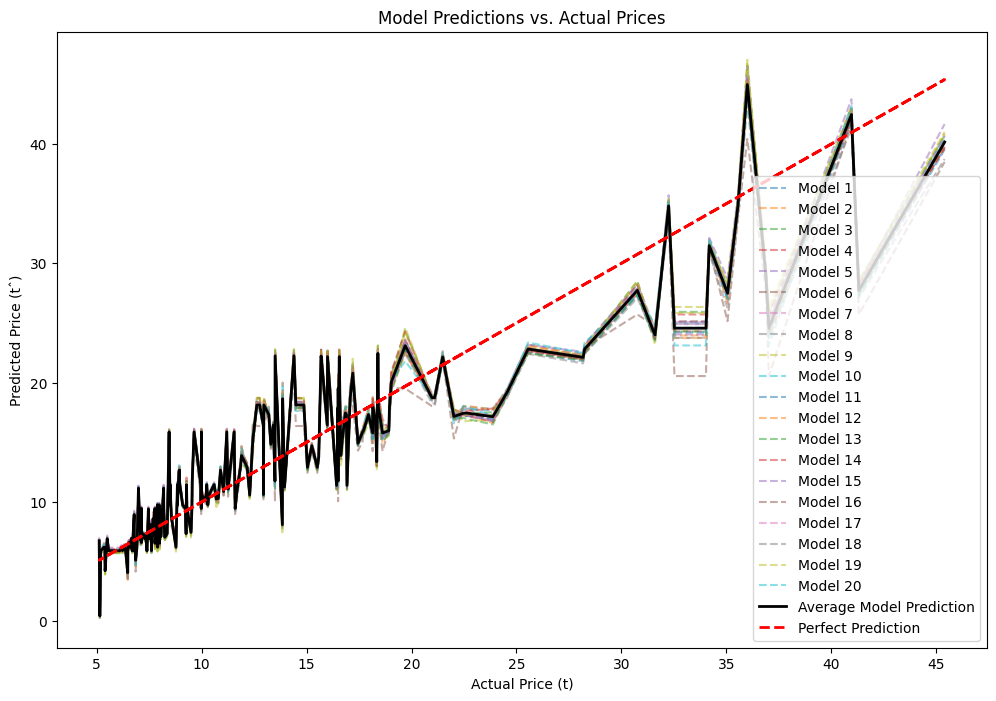

In [130]:
#predicted price vs actual price for first proposed model for 20 model realizations
plot_model_realizations(predictions, Y1, mean_predictions)

iii) Mean square error (MSE) for each model realization and  E{MSE} for this model. 

In [131]:
#MSE for each model realization for third proposed model and its mean E{MSE}
print("MSE for each model realization for third proposed model: \n", mean_scores)
print("shape of MSE for each model realization for third proposed model: ", mean_scores.shape)
print("\nMean E{MSE} for third proposed model: ", mean_mse)

MSE for each model realization for third proposed model: 
 [10.60135173 12.91389024 12.46309752 10.92991893 14.09979081 25.60865144
  9.36722694  9.23432214 13.0770678  13.03508277  9.60785985 12.8838968
  9.90293601 12.59283459 17.35722644 12.82125307  8.32472354 12.88885773
 12.09066747 16.428683   23.5520703  11.57992559  8.78437652 13.54979154
 12.56880741 18.05486978 14.75767534 11.20780228 12.11786369  8.59124548
 10.68814616 12.59115787 11.54606755 12.36190169 17.63906022 12.51376142
 12.00948098 17.10441347 12.52029586  8.89102217  9.13274514 12.23271059
 19.86498902  5.27694228 14.44836331 15.32094961 14.51230955 10.56313506
 10.95022825 13.2283694  17.56490666 10.08485736  8.82300662 14.35971103
 10.17300504 18.12611377 15.20915453  9.60741192 14.86962995  5.7113138
  6.94357841 15.14977175  9.92291205 11.92945366 17.00102702 11.79227567
 13.34855494  9.00456226 14.07722053 13.21381125  6.52034404 12.34082572
  9.75032785 18.44099599 18.63427323 17.39426608 11.38920518 16.066

iv) Variance and mean variance

In [132]:
print("Variance for third proposed model: ", variance)

Variance for third proposed model:  0.11208600083454293


v) (bias)^2 +noise variance = E{MSE} - variance

In [133]:
#Calculate Bias^2 + noise variance for third proposed model
bias_noise = mean_mse - variance
print("Bias^2 + noise variance for third proposed model: ", bias_noise)

Bias^2 + noise variance for third proposed model:  12.659334145640132


## Impression of variance and (bias)^2 + noise variance

vi) Variance for second proposed model:  0.09111166063512383
Bias^2 + noise variance for second proposed model:  19.701068918898823

The variance of the third model is higher than both the first and second models, indicating that this model is more sensitive to the training data. This increased sensitivity suggests that the model might be more complex or flexible, capturing more details (or noise) from the training data. However, the increase in variance is not so large.

The bias^2 + noise variance for the third model is lower than that of the second model and slightly lower than the first model. This decrease suggests that the third model is better at capturing the underlying relationship in the data than the second model and is slightly better than the first model in this respect. The reduction in systematic error (bias^2 + noise variance) compared to the second model implies that the adjustments made in the third model, possibly in terms of model complexity or feature engineering, have been effective in better modeling the underlying pattern of the data or dealing with its inherent noise.


d) 
First Model
Variance: 0.086933666343132
Bias^2 + noise variance: 12.981195925492605

Second Model
Variance: 0.09111166063512383
Bias^2 + noise variance: 19.701068918898823

Third Model
Variance: 0.11208600083454293
Bias^2 + noise variance: 12.659334145640132

Least Complex to Most Complex

Least Complex- Model 1
The first model has the lowest variance among the three, suggesting it is the least sensitive to changes in the training data, a characteristic of simpler models. Although its bias^2 + noise variance is not the lowest, it is close to that of the third model, indicating a substantial systematic error. Its lower variance compared to the others, however, suggests it's the least complex.

Moderately Complex- Model 2
The second model has a slightly higher variance than the first model, indicating a bit more complexity that allows it to fit the training data more closely. It also has the highest bias^2 + noise variance, suggesting significant systematic errors, potentially due to not capturing the underlying patterns well enough or being affected by data noise. Its higher variance and much higher bias^2 + noise variance place it as more complex than the first model but not necessarily more effectively complex, as its high systematic error indicates it may not be capturing the underlying pattern effectively.

Most Complex Model 3
The third model has the highest variance, which implies it is the most complex, capturing more details from the training data. This is consistent with a model that is more finely tuned to the data it's trained on. Despite its complexity, its bias^2 + noise variance is lower than the second model and slightly lower than the first, suggesting that its complexity has been effective in capturing the underlying data patterns with a more accurate fit, even though it may still be incorporating some noise from the data.

## Model selection
e)
1. **Model 1**
   - E{MSE}: 13.068129591835737
   - \(R^2\): 0.757286804891535
   - Variance: Low
   - Bias^2 + Noise Variance: Moderate

2. **Model 2**
   - E{MSE}: 19.792180579533948
   - \(R^2\): 0.7926647123915784
   - Variance: Slightly higher than Model 1
   - Bias^2 + Noise Variance: High

3. **Model 3**
   - E{MSE}: 12.771420146474675
   - \(R^2\): 0.7343004708034522
   - Variance: Highest among the three
   - Bias^2 + Noise Variance: Moderate, similar to Model 1

- **Model 1** offers a decent balance between complexity (bias-variance tradeoff) and predictive accuracy (E{MSE} and \(R^2\)). It has the lowest variance, suggesting stability across different datasets, but its performance metrics (E{MSE} and \(R^2\)) are not the best among the three models.
  
- **Model 2** despite having the highest \(R^2\) score, indicating it explains a higher proportion of the variance, also has the highest E{MSE}, suggesting it makes larger errors on average. Its higher bias^2 + noise variance indicates it might be capturing the underlying data pattern less effectively, which could be a concern for generalization.

- **Model 3** presents the lowest E{MSE}, indicating better average prediction accuracy, and a complexity that suggests it captures underlying data patterns more effectively than Model 2. However, its \(R^2\) score, while still good, is the lowest, suggesting it explains a slightly lower proportion of the variance in the dependent variable.

Hence, **Model 3** would be my selection. Despite its slightly lower \(R^2\) score, its lowest E{MSE} suggests it is the most accurate on average, and its higher variance is not excessively high, indicating a reasonable level of complexity that improves its predictive performance without overly compromising on stability. This model seems to strike the best balance between accuracy, explaining variance, and maintaining a reasonable bias-variance tradeoff, making it the most appealing choice for generalization to new data. This selection prioritizes average predictive accuracy (as indicated by E{MSE}) and effective complexity (as suggested by the bias-variance analysis), recognizing that no model perfectly balances all aspects of performance but that Model 3 offers a compelling compromise across the key metrics evaluated.

The selection process differs from Homework 1 (HW1), where the choice of Model 1 was based primarily on its high \(R^2\) value, indicating a strong ability to explain the variance in the data without the benefit of cross-validation. In HW1, the decision was simpler and more straightforward, focusing on a single metric of model performance.Now, with the introduction of cross-validation and a more nuanced evaluation including the bias-variance tradeoff, our analysis incorporates multiple metrics, providing a deeper understanding of each model's performance and generalization capability. This more comprehensive approach reveals that Model 3 is the preferable choice, despite its slightly lower \(R^2\) compared to Model 2.